In [2]:
#Aikasarjaennustaminen - ei trendiä eikä kausivaihtelua
#Yksinkertainen eksponentiaalinen tasoitus sopii aikasarjoille, joissa ei ole havaittavaa trendiä tai kausivaihtelua. Eksponentiaalisen tasoituksen mallit (yksinkertainen, kaksinkertainen ja kolminkertainen) ovat erityisen suosittuja liiketaloudessa kysynnän ennustamisessa. Mallit ovat helppokäyttöisiä, nopeasti laskettavissa ja helposti päivitettävissä uusien havaintojen myötä.
#Jos ennustetaan pidemmälle kuin seuraavaan aikaleimaan, niin yksinkertainen eksoponentiaalinen tasoitus antaa kaikille tuleville aikaleimoille saman ennusteen.
#Eksponentiaalinen tasoitus löytyy statsmodels.tsa-kirjastosta.
#Huomaa, että tässä esimerkissä yksinkertainen eksoponentiaalinen tasoitus ei ole hyvä malli, koska aikasarjassa on selkeä trendi ja kausivaihtelu, jotka malli jättää huomiotta!

import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [3]:
df=pd.read_csv('http://taanila.fi/Electric_Production.csv')
df.index=pd.to_datetime(df['DATE'],format='%m/%d/%Y')
df=df.drop('DATE',axis=1)
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


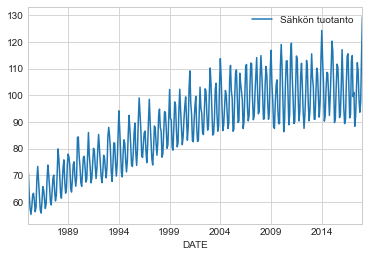

In [4]:
# Voin vaihtaa muuttujien nimiä myös rename()-toiminnolla
# Huomaa sanakirjan (dictionary) käyttö {}
df = df.rename(columns = {'IPG2211A2N': 'Sähkön tuotanto'})
df.plot()

In [5]:
#Mallin sovitus
#Ennustemalli sovitetaan (fit()) dataan. Tuloksena saadaan olio (tässä olen antanut oliolle nimeksi malli), joka sisältää monenlaista tietoa mallista.
#freq-parametrille käytän arvoa 'MS', koska kyseessä ovat kuukauden 1. päivä. Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
malli = ExponentialSmoothing(df['Sähkön tuotanto'], freq = 'MS').fit()

In [6]:
# malli-olion avulla saadaan mallin mukaan simuloidut ennusteet (fittedvalues)
df['Ennuste'] = malli.fittedvalues
df

,Sähkön tuotanto,Ennuste
DATE,,
1985-01-01,72.5052,72.504974
1985-02-01,70.6720,72.505200
1985-03-01,62.4502,70.672000
1985-04-01,57.4714,62.450200
1985-05-01,55.3151,57.471400
...,...,...
2017-09-01,98.6154,108.931200
2017-10-01,93.6137,98.615400
2017-11-01,97.3359,93.613700


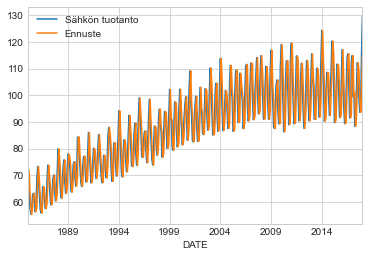

In [7]:
# Alkuperäinen aikasarja ja mallin mukaiset ennusteet samaan kaavioon
df.plot()

In [8]:
# Ennustevirheet (residuaalit) löytyvät malli-oliosta
df['Ennustevirhe'] = malli.resid
df

,Sähkön tuotanto,Ennuste,Ennustevirhe
DATE,,,
1985-01-01,72.5052,72.504974,0.000226
1985-02-01,70.6720,72.505200,-1.833200
1985-03-01,62.4502,70.672000,-8.221800
1985-04-01,57.4714,62.450200,-4.978800
1985-05-01,55.3151,57.471400,-2.156300
...,...,...,...
2017-09-01,98.6154,108.931200,-10.315800
2017-10-01,93.6137,98.615400,-5.001700
2017-11-01,97.3359,93.613700,3.722200


Text(0, 0.5, 'Ennustevirhe')

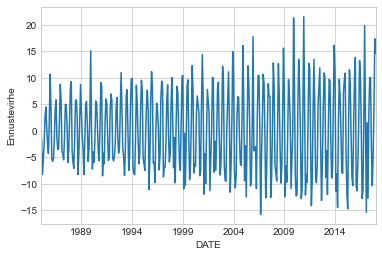

In [9]:
#Mallin tarkastelu
#Mallin hyvyyden tarkasteluun on monia tapoja. Tässä käytän
#ennustevirheiden aikasarjaa viivakaaviona
#ennusteiden ja toteutuneiden arvojen hajontakaaviota
#malliin liittyvää statistiikkaa, jonka saan summary()-toiminnolla.
#Huomaa erityisesti SSE (sum of squared errors). Mallia laskeva algoritmi yrittää saada SSE:n mahdollisimman pieneksi.
# Ennustevirheet aikasarjana
# On hyvä, jos ennustevirheiden aikasarjan vaihtelu on sattumanvaraista
df['Ennustevirhe'].plot()
plt.ylabel('Ennustevirhe')

Text(0, 0.5, 'Toteutunut kysyntä')

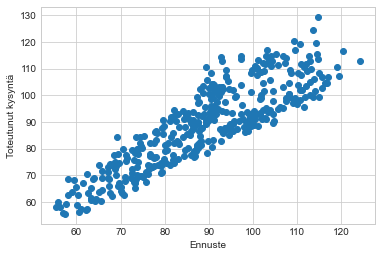

In [10]:
# Ennusteiden ja toteutuneiden kysyntöjen hajontakaavio
# Ennustemalli on sitä parempi, mitä paremmin pisteet seuraavat suoraa viivaa
# vasemmasta alakulmasta oikeaan yläkulmaan
plt.scatter(x = df['Ennuste'], y = df['Sähkön tuotanto'])
plt.xlabel('Ennuste')
plt.ylabel('Toteutunut kysyntä')

In [11]:
malli.summary()

Dep. Variable:,endog,No. Observations:,397
Model:,ExponentialSmoothing,SSE,23821.620
Optimized:,True,AIC,1629.482
Trend:,None,BIC,1637.450
Seasonal:,None,AICC,1629.584
Seasonal Periods:,None,Date:,"Fri, 15 Jan 2021"
Box-Cox:,False,Time:,16:04:36
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,72.504974,l.0,True


In [12]:
#Ennusteiden laskeminen
#Ennustettavien ajankohtien aikaleimojen määrittämiseksi:
#Ensimmäisen ennustettavan ajankohdan aikaleiman täytyy olla aikasarjan viimeisintä aikaleimaa seuraava aikaleima.
#Ennustettavien ajankohtien lukumäärän voin määrittää periods-parametrilla.
#Ennustettavien ajankohtien frekvenssin on oltava sama kuin mallia sovitettaessa käytetty freq-parametrin arvo.
#Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
#Tarkistan viimeisen aikaleiman
df.tail()

,Sähkön tuotanto,Ennuste,Ennustevirhe
DATE,,,
2017-09-01,98.6154,108.9312,-10.3158
2017-10-01,93.6137,98.6154,-5.0017
2017-11-01,97.3359,93.6137,3.7222
2017-12-01,114.7212,97.3359,17.3853
2018-01-01,129.4048,114.7212,14.6836


In [13]:
# Ennustettavien ajankohtien aikaleimat (alkupäivänä aikasarjan viimeistä aikaleimaa seuraava aikaleima)
index = pd.date_range('2018-02-01', periods = 12, freq = 'MS')

# Ennusteet 12 kuukaudelle
ennusteet = malli.forecast(12)

# Ennusteet dataframeen
df_ennuste = pd.DataFrame(data = ennusteet, index = index, 
                          columns = ['Ennuste'])
df_ennuste

,Ennuste
2018-02-01,129.4048
2018-03-01,129.4048
2018-04-01,129.4048
2018-05-01,129.4048
2018-06-01,129.4048
2018-07-01,129.4048
2018-08-01,129.4048
2018-09-01,129.4048
2018-10-01,129.4048
2018-11-01,129.4048


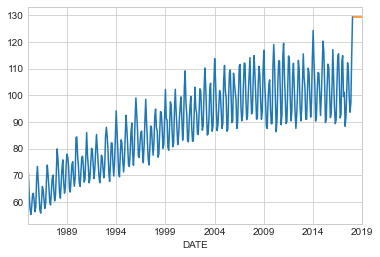

In [14]:
# Viivakaavio havainnoista
#Huomaa, että yksinkertainen eksponentiaalinen tasoitus antaa kaikille tuleville aikaleimoille saman ennusteen.
df['Sähkön tuotanto'].plot()

# Ennusteet kaavioon
df_ennuste['Ennuste'].plot()

In [15]:
df.head()

,Sähkön tuotanto,Ennuste,Ennustevirhe
DATE,,,
1985-01-01,72.5052,72.504974,0.000226
1985-02-01,70.6720,72.505200,-1.833200
1985-03-01,62.4502,70.672000,-8.221800
1985-04-01,57.4714,62.450200,-4.978800
1985-05-01,55.3151,57.471400,-2.156300
